# Optimizers
This is used to increase the performance and speed up the training.


Lets understand what is the work of optimizer in neural network? </br>
dataset -> 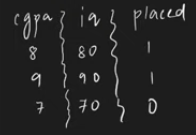
neural network -> 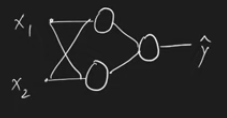


What a neural network do?</br>
Let's we have data(with 2 input columns and 1 output column as a classification task) and a simple neural network(1 hidden layer and 1 output layer) as shown above. </br>
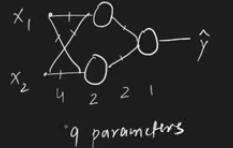</br>
We have weigths as shown. Here total 9 Weights we have.</br>
what we need to do, we have to find that particular value of these 9 weights and baises, for which, when we give data(from dataset) to neural network we get predicted value exactly(ideal case) or close to the original output.

In a way we can say neural network is actually a optimization problem, where we try to minimize the loss(diff between y and y^) and in the process of minimizing it, the parameters we get is the most optimum parameter.

So, to do these all things, in starting we keep a random value of weights and baises. And updating the parameters in oposite direction of the gradient of the loss function, slowly improving them we try to reach the correct values.(The graph of loss function will depend on the 9 parameters and here it will be of 10D)

Let we ahve the 3D graph of any other loss function </br>
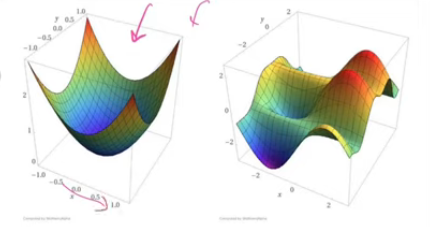</br>
some what like this the loss function(J(Q)) look in space.

Now, what we do we start with any random value and try to reach to minima of the surface(its good if we reach till global minima) where we have low loss and corresponding to that loss we try to find the weights and baises.

This is the entire thing and to do this we need optimizer.
The Optimizer we use in deep learning is `Gradient Descent`.</br>
In Gradient Descent we try to update the weights and biases.
To find the new value of weights and biases we subtract lr*the gradient of that weight vector w.r.t loss fun from old weights and baises.</br>
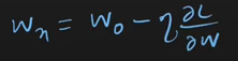</br>
And we do this thing in multiple loop(epoch) and eventually we reach to minima.

### There are Three Types of Gradient Descent.(These are optemizers)
Which differ in how much data we use to compute the gradient of the loss function. Depending on th eamount of data, we make a trade off between the accuracy of the paramaters update and the time takes to perform an update.

### 1. Batch Gradient Descent(vanilla gradient descent)</br>
   - Here we take the entire dataset and then we make an update.</br>
     Let we have 5 epoch(with 50 rows in dataset) -> In every epoch we will first do the prediction on all 50 data using current weights using dot product.</br>
   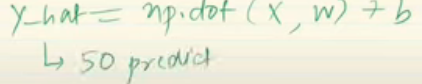
   
   - Now using the actual output and predicted value, we will calculate the loss.
   - And on the basis of this loss, 1 single time we will upadte the weight and baises.
   - Means, as here we have 5 epoches, we will update our weights and baises only 5 times</br>
   - Means we calculating the loss of whole dataset at once and applying gradient descent then updating the weights and baises.
   
   - take less time.
   - less accurate
   - here we need more epochs
   - if we see the loss gragh, there will be smoothness.
   - Graph is smooth bcz:
     - we take the loss of all the points and update once.
     - Here, where the weights and biases need to move is decided by a whole dataset point
     - The smooth behavior may put gradient descent in local minima if we have a fun where we have multiple minima.
    - Due to vectorization batch gradiet descent gets fast.(but some where it have disadvantage like if we hav 10 crore columns, vectorization of a row takes too much area in RAM as it will load a row once)
   
### 2. Stochastic Gradient Descent
   - In every epoch we first shuffle whole dataset then we pick any random data have the presiction on it, Calculate the loss then gradient descent and update the weights and baises and then we print the average loss of a epoch, For 50(number of data in dataset) time in every epoch.
   
   - if we have 10 epochs and 50 rows(data), there will 500 updation of weights and baises.(which is the big difference between Batch and Stochastic)
   
   - take high time.
   - more acuurate
   - Here need less epochs bcz in each epochs we updating the weights and baises that many number of times as we have numer of data(rows)
   - loss graph, loss reduced in vey unstable way, graph is staggered.
   - Graph is staggered bcz:
     - here every time we pich a random point and according to that point we do updates. 
     - Here, where the weights and biases need to move is decided by a random point</br>
     - The staggered behaviour have 1 advantage and 1 disadvantage
       - Advantage: Let the loss fun be complex(loss fun having multiple minima). Its possible that we get stuck in a local minima. so if we use SGD then the staggered behaviour may put out of that local minima and get in the global minima.
       
       - Disadvantage: it won't converge(to stop) at exact point. we won't get exact solution we get approx solution


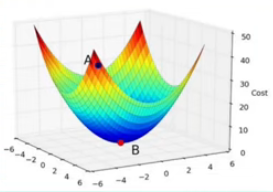</br>
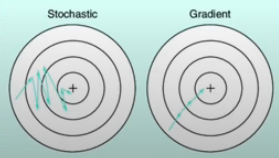

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('/kaggle/input/social-netowrk/T10_Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [5]:
X,y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [7]:
X_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [8]:
X_scaled.shape

(400, 2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [12]:
# this is Sochastic Grdient Descent
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/500
320/320 [==============================] - 1s 3ms/step - loss: 0.6361 - accuracy: 0.6781 - val_loss: 0.5524 - val_accuracy: 0.8000
Epoch 2/500
320/320 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.8031 - val_loss: 0.4322 - val_accuracy: 0.8750
Epoch 3/500
320/320 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8500 - val_loss: 0.3600 - val_accuracy: 0.9500
Epoch 4/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2969 - accuracy: 0.8625 - val_loss: 0.2926 - val_accuracy: 0.9500
Epoch 5/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2814 - accuracy: 0.8875 - val_loss: 0.2651 - val_accuracy: 0.9500
Epoch 6/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2785 - accuracy: 0.8813 - val_loss: 0.2409 - val_accuracy: 0.9625
Epoch 7/500
320/320 [==============================] - 1s 2ms/step - loss: 0.2754 - accuracy: 0.8813 - val_loss: 0.2386 - val_accuracy: 0.9500

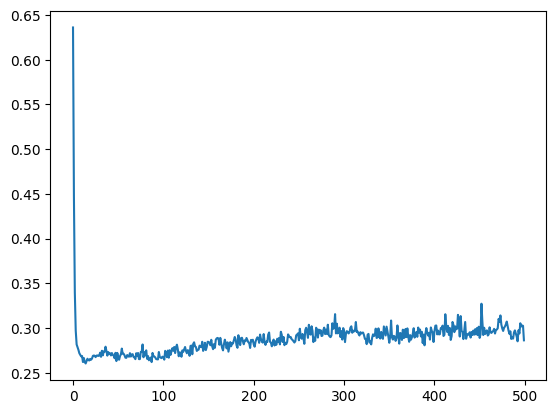

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [14]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
# here doing Batch Gradient Descent, just depend upon batch size
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 [==============================] - 1s 175ms/step - loss: 0.7922 - accuracy: 0.2594 - val_loss: 0.5877 - val_accuracy: 0.6250
Epoch 2/10
2/2 [==============================] - 0s 32ms/step - loss: 0.7717 - accuracy: 0.2469 - val_loss: 0.5826 - val_accuracy: 0.6375
Epoch 3/10
2/2 [==============================] - 0s 31ms/step - loss: 0.7581 - accuracy: 0.2500 - val_loss: 0.5818 - val_accuracy: 0.6375
Epoch 4/10
2/2 [==============================] - 0s 29ms/step - loss: 0.7473 - accuracy: 0.2500 - val_loss: 0.5776 - val_accuracy: 0.6625
Epoch 5/10
2/2 [==============================] - 0s 29ms/step - loss: 0.7382 - accuracy: 0.2594 - val_loss: 0.5762 - val_accuracy: 0.6750
Epoch 6/10
2/2 [==============================] - 0s 30ms/step - loss: 0.7296 - accuracy: 0.2781 - val_loss: 0.5748 - val_accuracy: 0.7125
Epoch 7/10
2/2 [==============================] - 0s 30ms/step - loss: 0.7218 - accuracy: 0.2812 - val_loss: 0.5740 - val_accuracy: 0.7375
Epoch 8/10
2/2 [==========

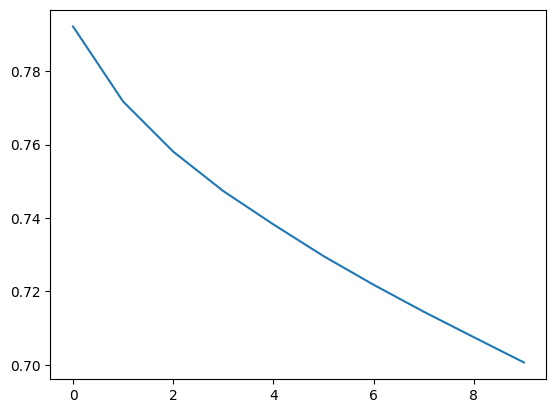

In [16]:
plt.plot(history.history['loss'])

### Mini Batch Gradient Descent

This is the mix of both batch and stochastic gradient descent.
Here first we create batch.
Let we have 320 rows and created 10 batches with 32 rows.
Now, in every epoch we will update the weights and baises 10 times as we have 10 batches.</br>

Algo : </br>
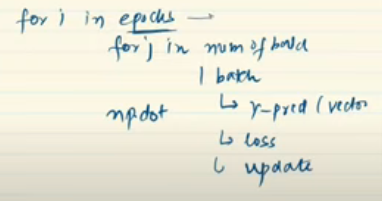</br>
Most of the times we use mini batch gradient descent

We give the batch size in multiple of 2, bcz to use RAM architecture effectivelly, basically it is an optimazation technique.</br>

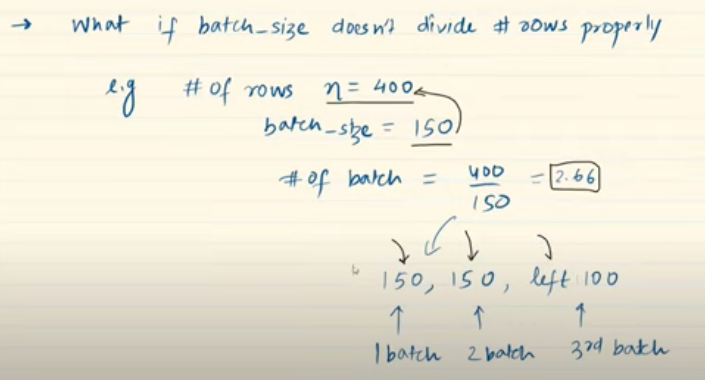